In [1]:
# import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing



%matplotlib inline

In [2]:
df = pd.read_csv("data/framingham.csv", na_values="?")
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Data Pre Processing

# Deal with Null Values

In [3]:
df.replace("?", np.NaN)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [4]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.shape

(4240, 16)

In [6]:
male = df['male'].isna().sum()*(100/4240)
age = df['age'].isna().sum()*(100/4240)
education = df['education'].isna().sum()*(100/4240)
currentSmoker = df['currentSmoker'].isna().sum()*(100/4240)
cigsPerDay = df['cigsPerDay'].isna().sum()*(100/4240)
BPMeds = df['BPMeds'].isna().sum()*(100/4240)
prevalentStroke = df['prevalentStroke'].isna().sum()*(100/4240)
prevalentHyp = df['prevalentHyp'].isna().sum()*(100/4240)
diabetes = df['diabetes'].isna().sum()*(100/4240)
totChol = df['totChol'].isna().sum()*(100/4240)
sysBP = df['sysBP'].isna().sum()*(100/4240)
diaBP = df['diaBP'].isna().sum()*(100/4240)
BMI = df['BMI'].isna().sum()*(100/4240)
heartRate = df['heartRate'].isna().sum()*(100/4240)
glucose = df['glucose'].isna().sum()*(100/4240)
TenYearCHD = df['TenYearCHD'].isna().sum()*(100/4240)


In [7]:
Null_Percentage = pd.DataFrame({
    'Attribute': ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose','TenYearCHD'],
    'Missing Values (%)' : [(round(male, 2)) ,(round(age, 2)) ,(round(education, 2)),(round(currentSmoker, 2)) ,(round(cigsPerDay, 2)) ,(round(BPMeds, 2)) ,(round(prevalentStroke, 2)) ,(round(prevalentHyp, 2)) ,(round(diabetes, 2)) ,(round(totChol, 2)) ,(round(sysBP, 2)) ,(round(diaBP, 2)) ,(round(BMI, 2)) ,(round(heartRate, 2)) ,(round(glucose, 2)),(round(TenYearCHD, 2))]
})
Null_Percentage.sort_values(by = 'Attribute', ascending = True)

,Attribute,Missing Values (%)
12,BMI,0.45
5,BPMeds,1.25
15,TenYearCHD,0.00
1,age,0.00
4,cigsPerDay,0.68
3,currentSmoker,0.00
11,diaBP,0.00
8,diabetes,0.00
2,education,2.48
14,glucose,9.15


In [8]:
df.fillna(round(df.mean(),2), inplace=True)
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [9]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979458,0.494104,9.005965,0.029620,0.005896,0.310613,0.025708,236.699528,132.354599,82.897759,25.800797,75.878981,81.963321,0.151887
std,0.495027,8.572942,1.007082,0.500024,11.881610,0.168481,0.076569,0.462799,0.158280,44.327521,22.033300,11.910394,4.070687,12.023929,22.831748,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [11]:
df = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose','TenYearCHD']]
df['TenYearCHD'] = df['TenYearCHD'].astype('int')
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Define X and Y for Implement Models

In [12]:
X = np.asarray(df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose']])
X[0:5]

array([[  1.  ,  39.  ,   4.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 195.  , 106.  ,  70.  ,  26.97,  80.  ,  77.  ],
       [  0.  ,  46.  ,   2.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
          0.  , 250.  , 121.  ,  81.  ,  28.73,  95.  ,  76.  ],
       [  1.  ,  48.  ,   1.  ,   1.  ,  20.  ,   0.  ,   0.  ,   0.  ,
          0.  , 245.  , 127.5 ,  80.  ,  25.34,  75.  ,  70.  ],
       [  0.  ,  61.  ,   3.  ,   1.  ,  30.  ,   0.  ,   0.  ,   1.  ,
          0.  , 225.  , 150.  ,  95.  ,  28.58,  65.  , 103.  ],
       [  0.  ,  46.  ,   3.  ,   1.  ,  23.  ,   0.  ,   0.  ,   0.  ,
          0.  , 285.  , 130.  ,  84.  ,  23.1 ,  85.  ,  85.  ]])

In [13]:
y = np.asarray(df['TenYearCHD'])
y[0:5]

array([0, 0, 0, 1, 0])

# Normalize Dataset

In [14]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.15311332, -1.23428297,  2.00657048, -0.98827627, -0.75806453,
        -0.17582853, -0.07701427, -0.67124101, -0.16243726, -0.94082514,
        -1.19626692, -1.08302716,  0.28725885,  0.34277521, -0.21741244],
       [-0.86721746, -0.41766419,  0.0204004 , -0.98827627, -0.75806453,
        -0.17582853, -0.07701427, -0.67124101, -0.16243726,  0.30008536,
        -0.5153989 , -0.1593552 ,  0.71966934,  1.59043465, -0.26121627],
       [ 1.15311332, -0.18434454, -0.97268464,  1.01186281,  0.92540762,
        -0.17582853, -0.07701427, -0.67124101, -0.16243726,  0.18727532,
        -0.22035608, -0.24332538, -0.11321223, -0.07311127, -0.52403923],
       [-0.86721746,  1.33223321,  1.01348544,  1.01186281,  1.76714369,
        -0.17582853, -0.07701427,  1.48977788, -0.16243726, -0.26396486,
         0.80094595,  1.0162273 ,  0.68281617, -0.90488424,  0.92148705],
       [-0.86721746, -0.41766419,  1.01348544,  1.01186281,  1.17792844,
        -0.17582853, -0.07701427, -0.67124101, 

# Spliting for Train & Test Dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (3392, 15) (3392,)
Test set: (848, 15) (848,)


# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred_lr = logreg.predict(X_test)
acc_log = round(logreg.score(X_test,y_test) * 100, 2)
print("Logistic Regression Accuracy: ", acc_log)

Logistic Regression Accuracy:  85.26


In [17]:
from sklearn.model_selection import cross_val_score
cvs_lr = round((cross_val_score(logreg, X,y,cv=10,scoring='accuracy')).mean()*100,2)
print('Cross Validated Score:', cvs_lr)

Cross Validated Score: 85.5


In [18]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, Y_pred_lr)
print("Classificiation Report: \n", class_report)

Classificiation Report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       719
           1       0.67      0.06      0.11       129

    accuracy                           0.85       848
   macro avg       0.76      0.53      0.52       848
weighted avg       0.83      0.85      0.80       848



Text(0.5, 1.05, 'Confusion Matrix (Logistic Regression)')

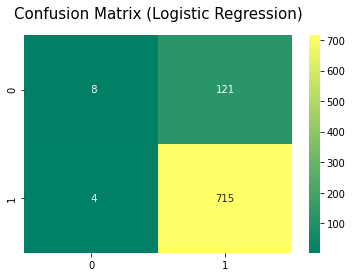

In [19]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred_lr, labels=[1,0])
sns.heatmap(cnf_matrix,annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion Matrix (Logistic Regression)', y=1.05, size=15)

In [20]:
from sklearn.metrics import jaccard_score
jac_score_logreg = round(jaccard_score(y_test, Y_pred_lr, pos_label=0) * 100, 2)
print("Jaccard Score: ", jac_score_logreg)

Jaccard Score:  85.12


Attribute: 0, Score: 0.23256
Attribute: 1, Score: 0.56377
Attribute: 2, Score: 0.00919
Attribute: 3, Score: 0.01481
Attribute: 4, Score: 0.27070
Attribute: 5, Score: 0.05934
Attribute: 6, Score: 0.04948
Attribute: 7, Score: 0.08314
Attribute: 8, Score: 0.03117
Attribute: 9, Score: 0.08771
Attribute: 10, Score: 0.29480
Attribute: 11, Score: -0.01625
Attribute: 12, Score: 0.02291
Attribute: 13, Score: -0.02007
Attribute: 14, Score: 0.15429


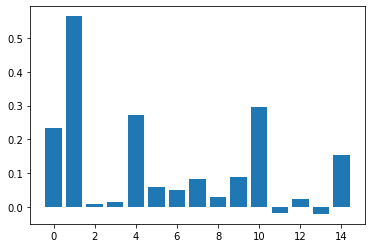

Standard Daviation of Feature Importance 0.15


In [21]:
importance_lr = logreg.coef_[0]
for i,v in enumerate(importance_lr):
    print('Attribute: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance_lr))], importance_lr)
plt.show()
std_lr = round(np.std(importance_lr), 2)
print("Standard Daviation of Feature Importance", std_lr)

# Creating a logistic_reg1.sav

import pickle
import os
#Saving the model
if not os.path.exists('models'):
    os.makedirs('models')
    
MODEL_PATH = "models/logistic_reg1.sav"
pickle.dump(logreg, open(MODEL_PATH, 'wb'))

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
import pickle

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
log_reg = LogisticRegression()


log_reg.fit(X_train, y_train)

LogisticRegression()

In [32]:
inputt=[float(x) for x in "1,48,1,1,20,0,0,0,0,245,127.5,80,25.34,75,70".split(',')]
final=[np.array(inputt)]
b = log_reg.predict_proba(final)
pickle.dump(log_reg,open('models/logistic_reg1.sav','wb'))
model=pickle.load(open('models/logistic_reg1.sav','rb'))

In [38]:
# initialize list of lists 
data = [[0,45,2,1,20,0,0,0,0,313,100,71,21.68,79,78]] 
   
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate','glucose']) 

#Predict On new Data
new_pred = logreg.predict(df)
new_pred

array([1])